<a href="https://colab.research.google.com/github/IlV3Vll/250402/blob/main/loan_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil, pandas as pd
from google.colab import drive
drive.mount('/gdrive')
dataset = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/data/loan_data_set.csv')
dataset = dataset.dropna()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
dataset = dataset.sample(frac=1)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_feats = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
for i in categorical_feats:
  dataset.loc[:,i] = le.fit_transform(dataset.loc[:,i])

In [ ]:
import numpy as np

dataset = pd.DataFrame(dataset).values.astype(float)

dat22a = dataset[:, 1:]
data = dataset[:, 1:-1]
label = dataset[:, -1:]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

last_column = data[:, -1].reshape(-1, 1)

encoder = OneHotEncoder()
encoded_last_column = encoder.fit_transform(last_column)

arr_without_last_column = data[:, :-1]
data = np.concatenate((arr_without_last_column, encoded_last_column.toarray()), axis=1)

In [ ]:
quad = int(len(dataset)/5)
train_data = data[:quad * 4]
test_data = data[-quad:]
train_label = label[:quad * 4]
test_label = label[-quad:]

In [ ]:
np.count_nonzero(label)/len(label)
print(len(label), len(data))

480 480


In [ ]:
data[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.466e+03,
       1.210e+03, 1.300e+02, 3.600e+02, 1.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00])

In [ ]:
label[0]

array([1.])

In [205]:
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras.optimizers import Adam


def get_model():
  inputs = keras.Input(shape=(13,))
  x = layers.Flatten()(inputs)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(256, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(512, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(256, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization()(x)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization()(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      optimizer=Adam(learning_rate=0.001),
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )
  return model

In [206]:
k = 3
num_validation_samples = len(train_data) // k

validation_scores = []
for fold in range(k):
    val_data = train_data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    val_label = train_label[num_validation_samples * fold:num_validation_samples * (fold + 1)]

    partial_train_data = np.concatenate(
        [train_data[:num_validation_samples * fold],
         train_data[num_validation_samples * (fold + 1):]])

    model = get_model()
    model.fit(train_data, train_label,
              epochs=30,
              batch_size=64)

    validation_score = model.evaluate(val_data, val_label)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4661 - loss: 0.8805
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5321 - loss: 0.8560
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5514 - loss: 0.8207
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5860 - loss: 0.7493
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6167 - loss: 0.6835
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5186 - loss: 0.8077
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5363 - loss: 0.7644
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5590 - loss: 0.7676
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5879 - loss: 0.7381
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6167 - loss: 0.6657
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6186 - loss: 0.6874
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6577 - loss: 0.6485
E

In [207]:
print(validation_score, validation_scores)

0.6515355408191681 [[0.6375774145126343, 0.6640625], [0.6129211187362671, 0.6875], [0.5805897116661072, 0.7265625]]


In [ ]:
model = get_model()
history = model.fit(train_data, train_label,
              epochs=20,
              batch_size=64)
test_score = model.evaluate(test_data, test_label)
print(test_score)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5548 - loss: 135.4668
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5426 - loss: 130.9686 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5506 - loss: 126.7239 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5331 - loss: 115.2523 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5334 - loss: 107.9948
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5640 - loss: 86.7618 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5164 - loss: 91.6662  
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5466 - loss: 85.7415 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5623 - loss: 79.3707 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6044 - loss: 65.1682 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6359 - loss: 68.3521 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6703 - 

In [176]:
print(test_score)

[46.829586029052734, 0.6875]


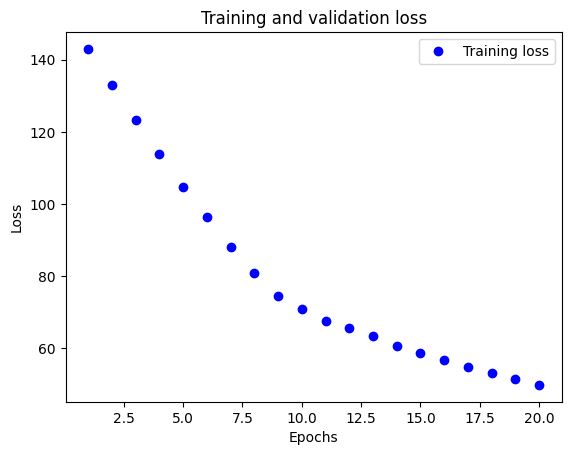

In [175]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(test_data, test_label)
print(result)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5859 - loss: 7.5318
[6.946617126464844, 0.59375]
